In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys; sys.path.insert(0, '../')
import pandas as pd
import tqdm
import pickle

import vis
import numpy as np
import warnings

In [2]:
### Configure file and folder names
data_h5 = "../data/paper/soccermix_all_data.h5"
models = "../data/paper/soccermix_models.pkl"

c_weights = "../data/paper/soccermix_all_catweights.pkl"
l_weights = "../data/paper/soccermix_all_locweights.pkl"
d_weights = "../data/paper/soccermix_all_dirweights.pkl"

spadl_h5 = "../data/tomd/spadl-statsbomb.h5"

In [3]:
X = pd.read_hdf(data_h5, "X")

In [4]:
def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break

items = loadall(models)
d_w = loadall(d_weights)

In [5]:
cat_model = next(items)
loc_models = next(items)
dir_models = next(items)

In [6]:
dir_weights = next(d_w)

In [7]:
teams = pd.read_hdf(spadl_h5, "teams")

In [8]:
games = pd.read_hdf(spadl_h5, "games")

In [9]:
games1819 = games[((games.competition_name == "Premier League") & 
                   (games.season_name == "2018/2019"))]

In [10]:
merged_weights = dir_weights.copy()
merged_weights["team_id"] = X.team_id.values
merged_weights["game_id"] = X.game_id.values

In [11]:
merged_weights = merged_weights[merged_weights.game_id.isin(games1819.game_id)]

In [12]:
print(teams[teams.team_name == 'Manchester City'].team_id)
print(teams[teams.team_name == 'Liverpool'].team_id)

7    36
Name: team_id, dtype: int64
18    24
Name: team_id, dtype: int64


In [13]:
compare = {36, 24} #Manchester City, Liverpool
vectors = {}
set_teams = set(merged_weights.team_id.astype('int'))

for p in compare:
    other = compare - {p}
    p2 = next(iter(other))
        
    A_home_B = games1819[( (games1819.home_team_id == p) & (games1819.away_team_id == p2))].game_id.values
    
    A_away_B = games1819[( (games1819.away_team_id == p) & (games1819.home_team_id == p2))].game_id.values
    
    A_other = games1819[(((games1819.home_team_id == p) & ~(games1819.away_team_id == p2))
                         | ((games1819.away_team_id == p) & ~(games1819.home_team_id == p2))
                        )].game_id.values
        
    vec1 = merged_weights.loc[((merged_weights.game_id.isin(A_home_B)) 
                                  & (merged_weights.team_id == p)), dir_weights.columns].sum().values
    
    vec2 = merged_weights.loc[((merged_weights.game_id.isin(A_other))
                                  & (merged_weights.team_id == p)), dir_weights.columns].sum().values
    
    vec2 /= 36
    
    vec3 = merged_weights.loc[((merged_weights.game_id.isin(A_away_B)) 
                                  & (merged_weights.team_id == p)), dir_weights.columns].sum().values
    
    vectors[f'{int(p)}_{int(p2)}_0'] = vec1 #home game of team 1 against team 2
    vectors[f'{int(p)}_{int(p2)}_1'] = vec2 #all games of team 1 not against team 2
    vectors[f'{int(p)}_{int(p2)}_2'] = vec3 #away game of team 1 against team 2


In [14]:
vectors_pd = pd.concat({k: pd.DataFrame(v).T for k,v in vectors.items()}).droplevel(level=1)
vectors_pd.index.name = "team_game"
vectors_pd.columns = dir_weights.columns

# How did Liverpool play differently the away game against city (loss) vs home game against city (draw)

out 6


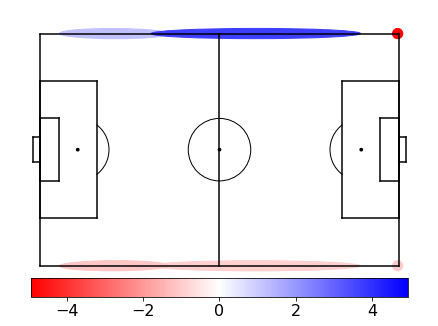

clearance 3
clearance_0 3
clearance_1 2
clearance_2 2


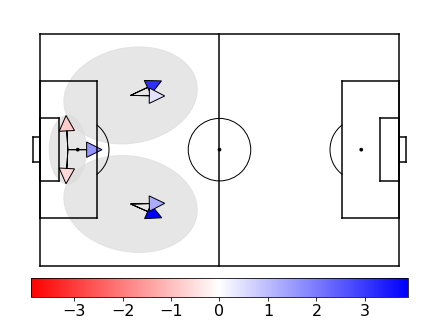

freekick 4
freekick_0 1
freekick_1 1
freekick_2 2
freekick_3 2


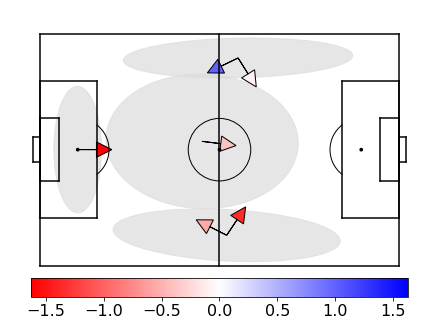

throw_in 6
throw_in_0 2
throw_in_1 4
throw_in_2 4
throw_in_3 2
throw_in_4 4
throw_in_5 4


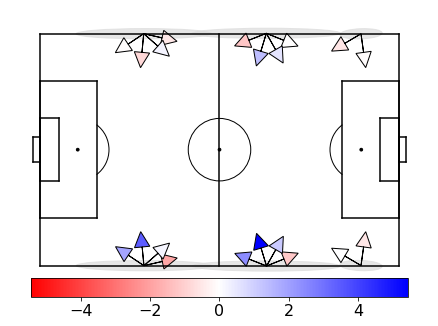

goalkick 1
goalkick_0 3


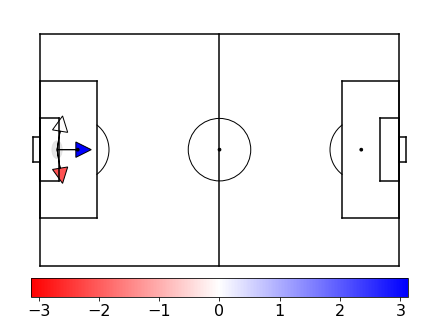

owngoal 1


../vis.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(u[1] / u[0])


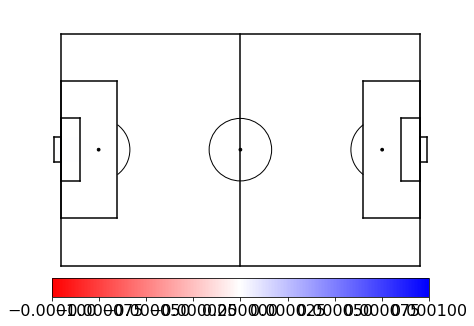

goal 1


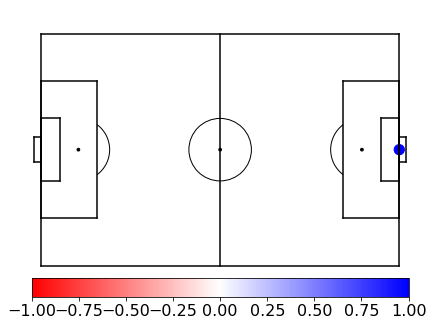

bad_touch 5


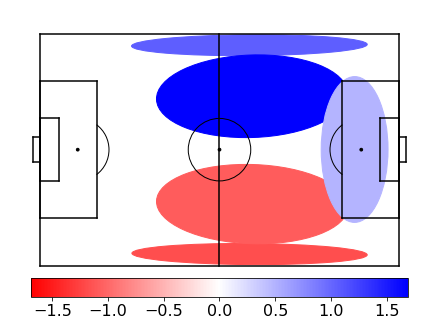

red_card 1


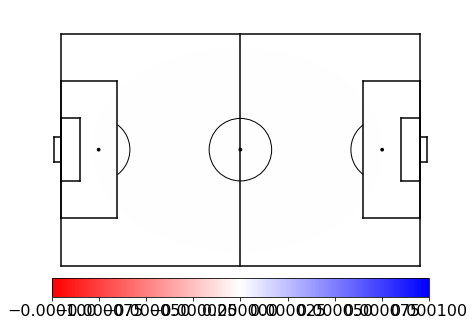

offside 4


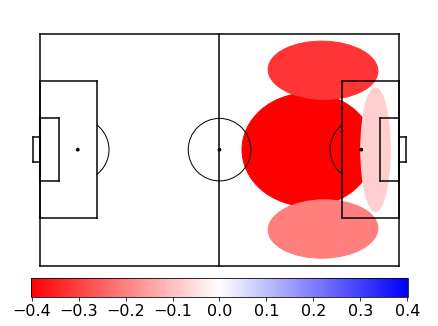

cross 4
cross_0 1
cross_1 1
cross_2 2
cross_3 2


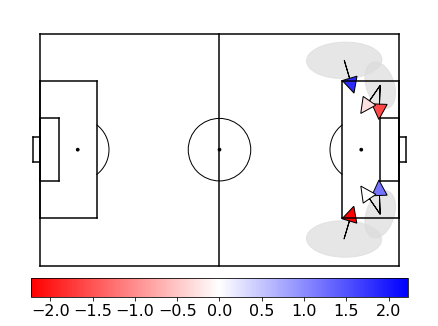

shot 3
shot_0 2
shot_1 1
shot_2 1


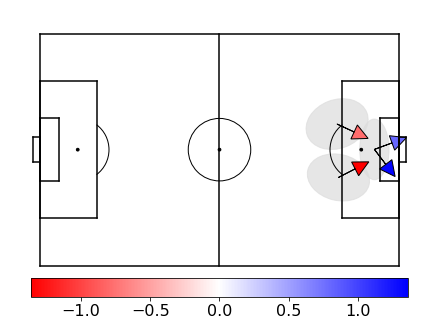

take_on 6


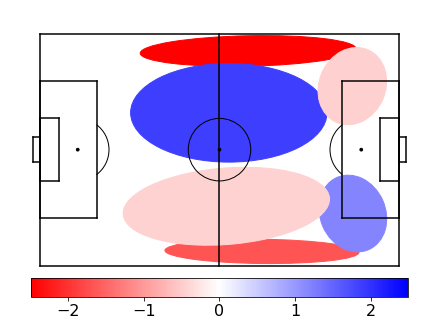

keeper_catch 3


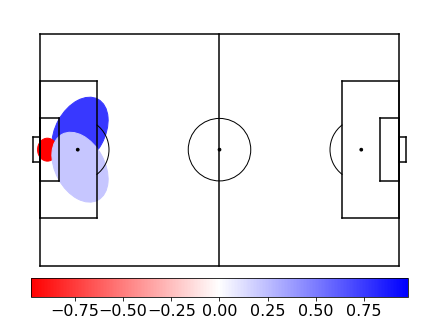

interception 8


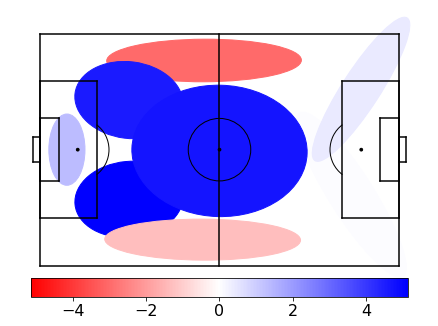

foul 5


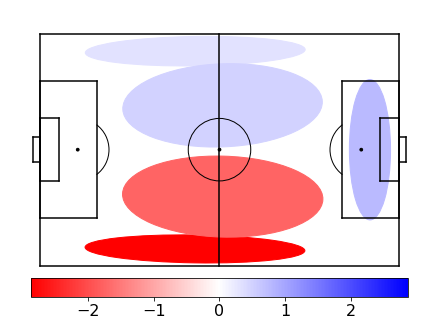

shot_penalty 1
shot_penalty_0 2


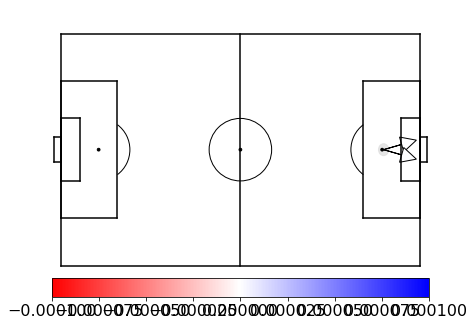

tackle 6


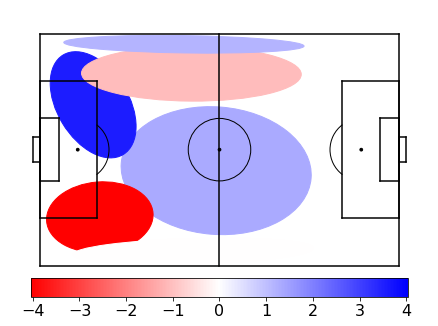

corner 2
corner_0 2
corner_1 2


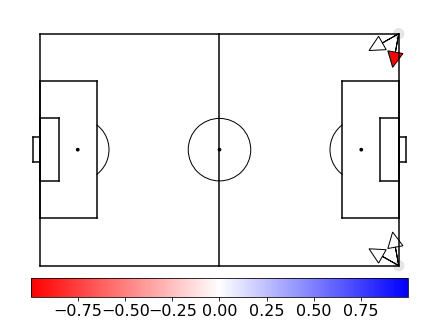

yellow_card 1


../vis.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(u[1] / u[0])


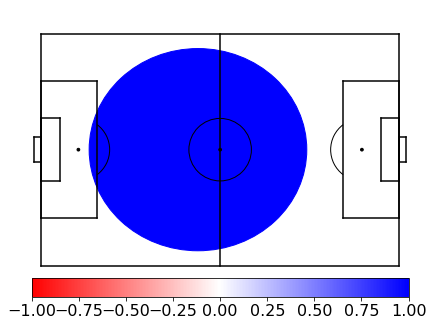

pass 24
pass_0 2
pass_1 4
pass_2 2
pass_3 2
pass_4 2
pass_5 4
pass_6 4
pass_7 2
pass_8 4
pass_9 2
pass_10 4
pass_11 4
pass_12 3
pass_13 2
pass_14 4
pass_15 2
pass_16 4
pass_17 4
pass_18 3
pass_19 2
pass_20 2
pass_21 3
pass_22 4
pass_23 2


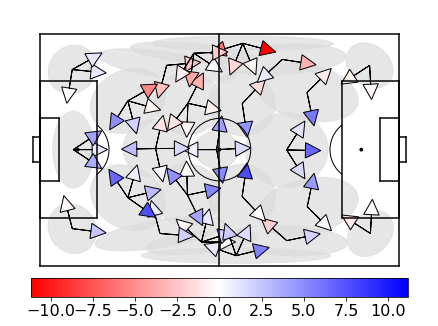

dribble 26
dribble_0 2
dribble_1 2
dribble_2 2
dribble_3 2
dribble_4 2
dribble_5 2
dribble_6 2
dribble_7 3
dribble_8 3
dribble_9 3
dribble_10 2
dribble_11 2
dribble_12 1
dribble_13 2
dribble_14 2
dribble_15 3
dribble_16 2
dribble_17 2
dribble_18 2
dribble_19 3
dribble_20 1
dribble_21 2
dribble_22 2
dribble_23 2
dribble_24 2
dribble_25 1


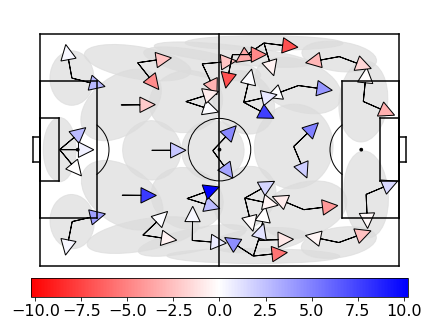

receival 26


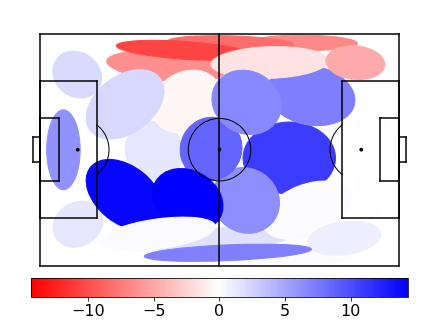

In [15]:
vis.show_component_differences(loc_models, dir_models, vectors_pd.loc['24_36_2'], vectors_pd.loc['24_36_0'], 'Liverpool', 'ManchesterCity', save=False)

# How did liverpool play differently the away game against city (loss) vs any other game?

out 6


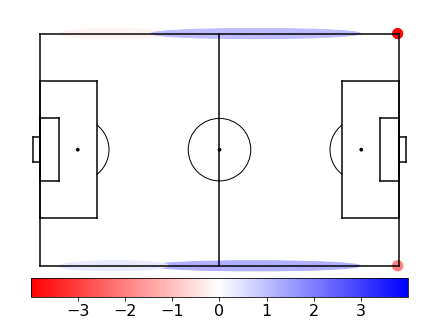

clearance 3
clearance_0 3
clearance_1 2
clearance_2 2


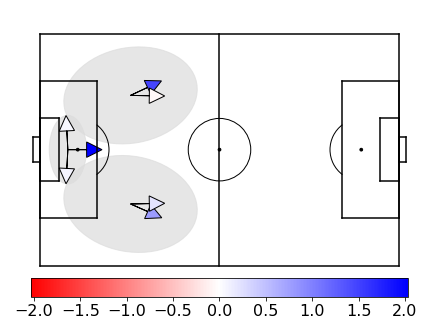

freekick 4
freekick_0 1
freekick_1 1
freekick_2 2
freekick_3 2


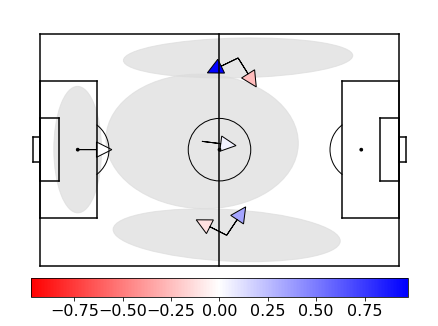

throw_in 6
throw_in_0 2
throw_in_1 4
throw_in_2 4
throw_in_3 2
throw_in_4 4
throw_in_5 4


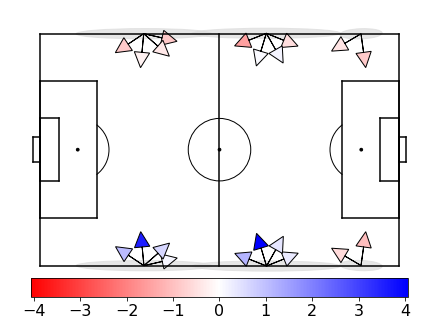

goalkick 1
goalkick_0 3


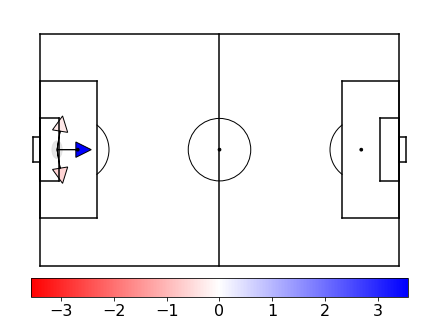

owngoal 1


../vis.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(u[1] / u[0])


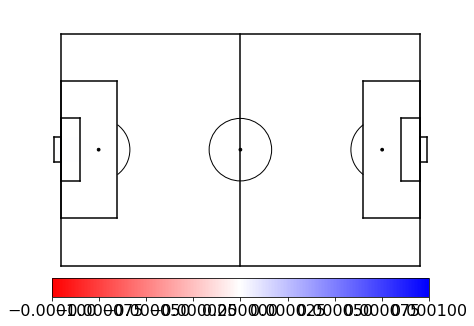

goal 1


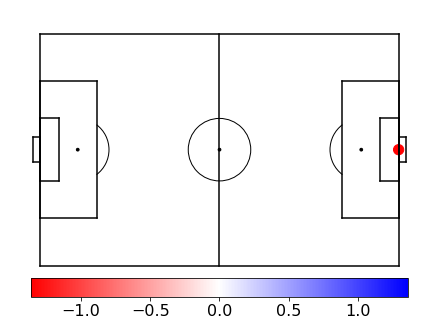

bad_touch 5


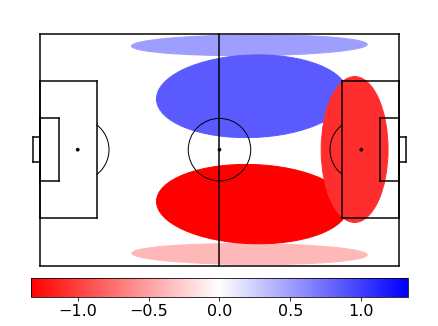

red_card 1


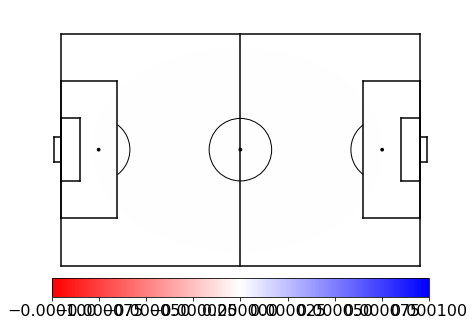

offside 4


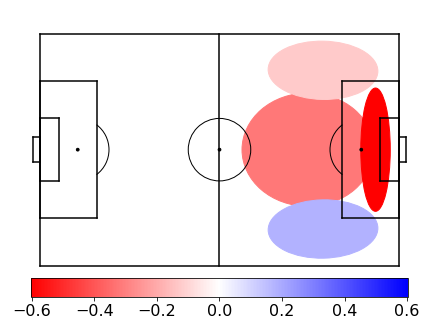

cross 4
cross_0 1
cross_1 1
cross_2 2
cross_3 2


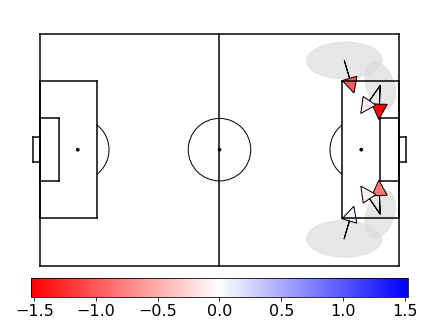

shot 3
shot_0 2
shot_1 1
shot_2 1


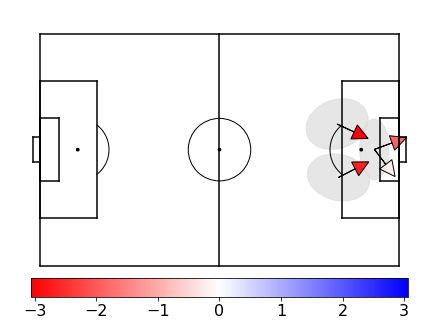

take_on 6


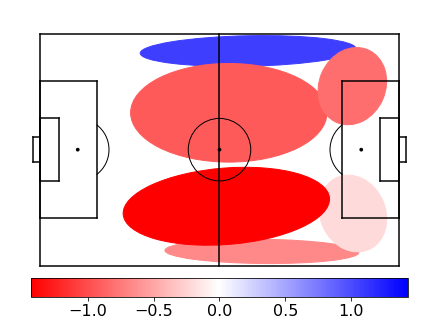

keeper_catch 3


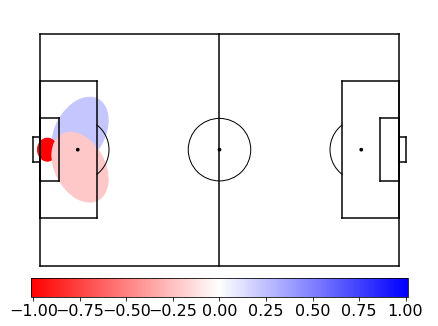

interception 8


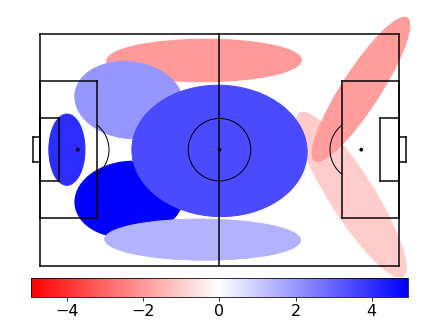

foul 5


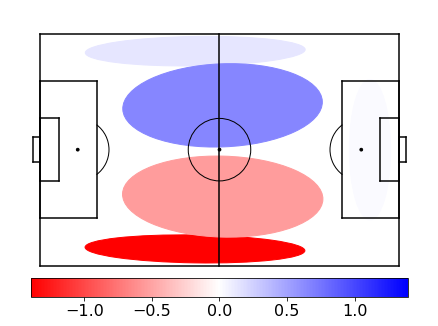

shot_penalty 1
shot_penalty_0 2


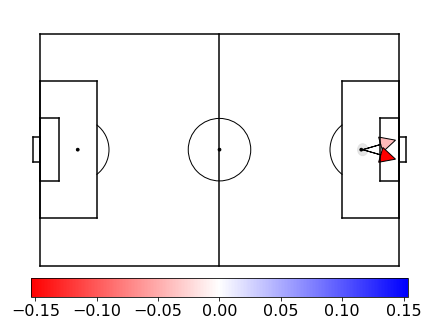

tackle 6


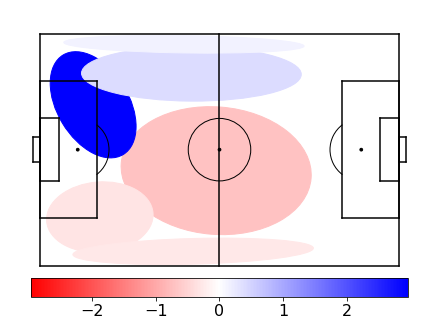

corner 2
corner_0 2
corner_1 2


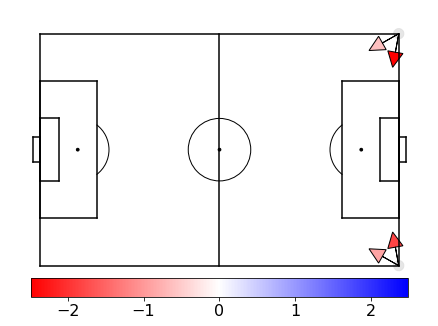

yellow_card 1


../vis.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  angle = np.arctan(u[1] / u[0])


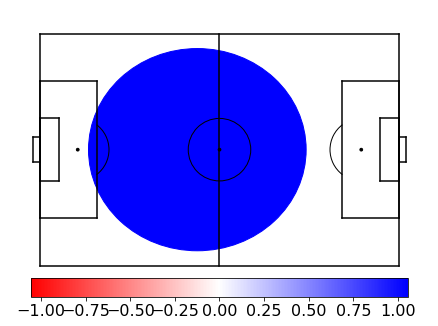

pass 24
pass_0 2
pass_1 4
pass_2 2
pass_3 2
pass_4 2
pass_5 4
pass_6 4
pass_7 2
pass_8 4
pass_9 2
pass_10 4
pass_11 4
pass_12 3
pass_13 2
pass_14 4
pass_15 2
pass_16 4
pass_17 4
pass_18 3
pass_19 2
pass_20 2
pass_21 3
pass_22 4
pass_23 2


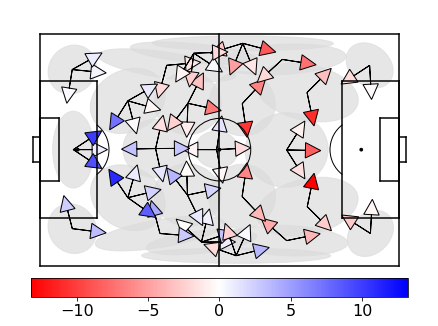

dribble 26
dribble_0 2
dribble_1 2
dribble_2 2
dribble_3 2
dribble_4 2
dribble_5 2
dribble_6 2
dribble_7 3
dribble_8 3
dribble_9 3
dribble_10 2
dribble_11 2
dribble_12 1
dribble_13 2
dribble_14 2
dribble_15 3
dribble_16 2
dribble_17 2
dribble_18 2
dribble_19 3
dribble_20 1
dribble_21 2
dribble_22 2
dribble_23 2
dribble_24 2
dribble_25 1


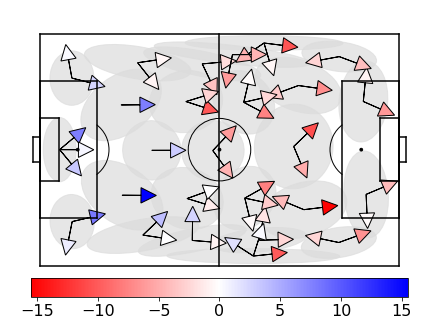

receival 26


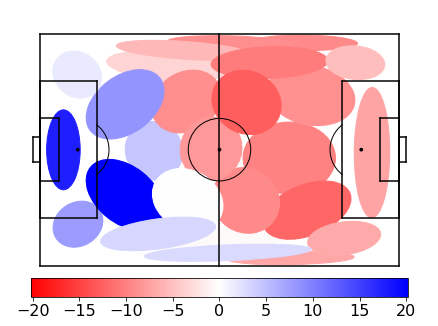

In [16]:
vis.show_component_differences(loc_models, dir_models, vectors_pd.loc['24_36_2'], vectors_pd.loc['24_36_1'], 'Liverpool', 'ManchesterCity', save=False)